In [2]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.style.use("dark_background")

In [3]:
# The three scaling functions corresponding to the ones described in section 2.1 of the textbook.
def f1(triangle):
    """
    Scales to half. The halved triangle falls on the lower left corner.
    """
    point1 = (Polygon.get_xy(triangle).copy())[0] # The lower left point is fixed.
    point2 = (Polygon.get_xy(triangle).copy())[1]
    point3 = (Polygon.get_xy(triangle).copy())[2]
    side_length = (point2[0] - point1[0]) / 2
    point2[0] = point2[0] - side_length
    point3[0] = point3[0] - side_length/2
    point3[1] = point1[1] + side_length * np.sin(np.pi/3)
    return Polygon((point1, point2, point3))


def f2(triangle):
    """
    Scales to half. The halved triangle falls on the lower right corner.
    """
    point1 = (Polygon.get_xy(triangle).copy())[0]
    point2 = (Polygon.get_xy(triangle).copy())[1] # The lower right point is fixed.
    point3 = (Polygon.get_xy(triangle).copy())[2]
    side_length = (point2[0] - point1[0]) / 2
    point1[0] = point1[0] + side_length
    point3[0] = point3[0] + side_length/2
    point3[1] = point2[1] + side_length * np.sin(np.pi/3)
    return Polygon((point1, point2, point3))


def f3(triangle):
    """
    Scales to half. The halved triangle falls on the upper corner.
    """
    point1 = (Polygon.get_xy(triangle).copy())[0]
    point2 = (Polygon.get_xy(triangle).copy())[1]
    point3 = (Polygon.get_xy(triangle).copy())[2] # The upper point is fixed.
    side_length = (point2[0] - point1[0]) / 2
    point1[0] = point1[0] + side_length/2
    point1[1] = point1[1] + side_length * np.sin(np.pi/3)
    point2[0] = point2[0] - side_length/2
    point2[1] = point2[1] + side_length * np.sin(np.pi/3)
    return Polygon((point1, point2, point3))


# The recursive function that does the principal job of creating the Sierpinski Triangle:
def recursive_deterministic_sierpinski(n, triangle):
    """
    n: int
    triangle: Polygon Object with three points

    n is the level of the Sierpinski Triangle. It starts from 0.
    """
    if n==0:
        ax.add_artist(triangle)
    else:
        recursive_deterministic_sierpinski(n-1, f1(triangle))
        recursive_deterministic_sierpinski(n-1, f2(triangle))
        recursive_deterministic_sierpinski(n-1, f3(triangle))

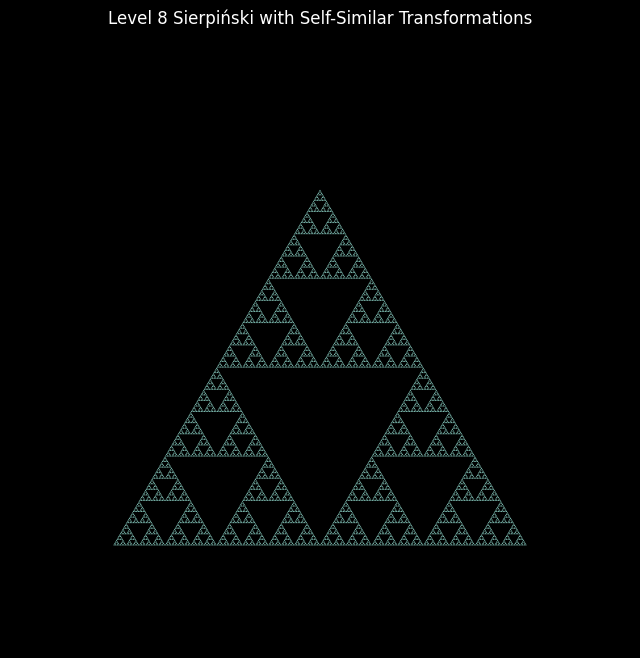

In [26]:
plt.close("all")
# Initializing axes and figure for plotting:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-10,50)
ax.set_ylim(-10,50)
ax.set_axis_off()

# Using matplotlib.patches.Polygon to define a triangle. A triangle is made up of 3 points, so these 3 points will
# have to be defined first and then passed to the Polygon function.
# The anchor is an arbitrary point used to determine the lower left corner of the triangle on the plot.
# Note that the anchor and the side_length variables should be chosen in such a way so that
# the shape fall in the x and y limits of the plot as determined in the code lines above.
anchor = 0
side_length = 40
# Lower left corner:
point1 = np.array([anchor, anchor])
# Lower right corner:
point2 = np.array([anchor + side_length, anchor])
# Upper corner:
point3 = np.array([anchor + side_length/2, anchor + side_length * np.sin(np.pi/3)])
# A triangular shaped, Polygon Object is defined using the above three points:
triangle = Polygon((point1, point2, point3))

#Calling the function for an nth-level Sierpinski Triangle:
n = 8
recursive_deterministic_sierpinski(n, triangle)
ax.set_title(f"Level {n} Sierpiński with Self-Similar Transformations")
plt.show()